In [1]:
print('Thessaloniki Weather')

Thessaloniki Weather


In [2]:
import pandas as pd

df = pd.read_csv('data/thessaloniki-weather.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.tail()

,Mean_temp,Min_temp,Max_temp,Mean_humidity,Min_humidity,Max_humidity,Mean_pressure,Min_pressure,Max_pressure,Daily_precipitation,Mean_wind_speed,Wind_direction,Max_wind_speed
Date,,,,,,,,,,,,,
2019-12-27,8.0,8.1,8.0,61.7,71,52,1019.0,1020.5,1017.7,0.0,24.8,NNW,33.9
2019-12-28,6.3,6.3,6.2,65.2,71,49,1018.9,1021.8,1016.9,0.0,23.4,N,31.9
2019-12-29,4.5,4.6,4.5,66.8,73,58,1023.3,1024.9,1021.8,0.0,26.4,N,35.7
2019-12-30,4.7,4.8,4.6,66.9,73,59,1025.8,1028.3,1024.1,0.0,29.7,NNW,39.8
2019-12-31,5.6,5.7,5.5,57.0,70,43,1026.3,1028.6,1022.7,0.0,19.1,NNW,25.9


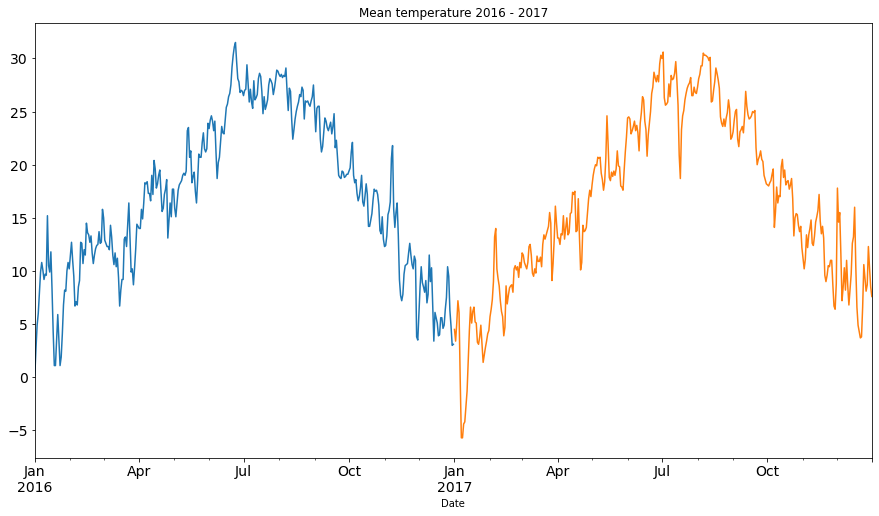

In [3]:
import matplotlib.pyplot as plt

mean_temp_2016 = df.loc['2016']['Mean_temp']
mean_temp_2017 = df.loc['2017']['Mean_temp']

mean_temp_2016.plot(figsize=(15,8), title= 'Mean temperature 2016 - 2017', fontsize=14)
mean_temp_2017.plot()
plt.show()

# Naive Forecasting

In [4]:
forecasting_temp_2017 = mean_temp_2017.copy()
forecasting_temp_2017[0:] = mean_temp_2016[-1]

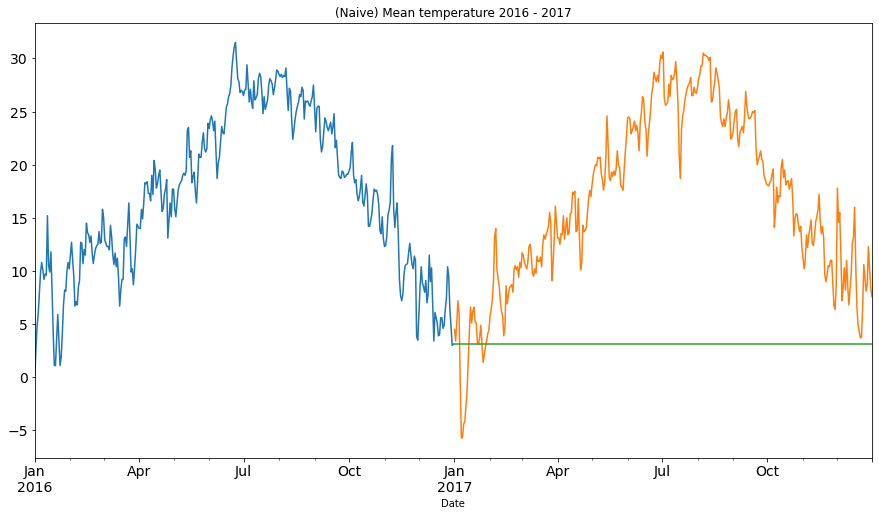

In [5]:
plt.figure('naive')
mean_temp_2016.plot(figsize=(15,8), title= '(Naive) Mean temperature 2016 - 2017', fontsize=14)
mean_temp_2017.plot()
forecasting_temp_2017.plot()
plt.show()

In [6]:
forecast_error = [mean_temp_2017[i] - forecasting_temp_2017[i] for i in range(0, mean_temp_2017.size)]
mean_absolute_deviation = sum([abs(fe) for fe in forecast_error]) / mean_temp_2017.size
print(f'MPA: ', mean_absolute_deviation)
mean_square_error = sum([(fe ** 2) for fe in forecast_error]) / mean_temp_2017.size
print(f'MSE: ', mean_square_error)
mean_absolute_percent_error = (sum([forecast_error[i]/mean_temp_2017[i] for
									i in range(0, len(forecast_error))]) / mean_temp_2017.size) * 100
print(f'MAPE: ', mean_absolute_percent_error)

MPA:  13.664931506849314
MSE:  243.1257808219177
MAPE:  80.69819695479488


# SNaive Forecasting

In [7]:
forecasting_temp_2017 = mean_temp_2017.copy()
forecasting_temp_2017[0:] = [mean_temp_2016[i] for i in range(forecasting_temp_2017.size)]

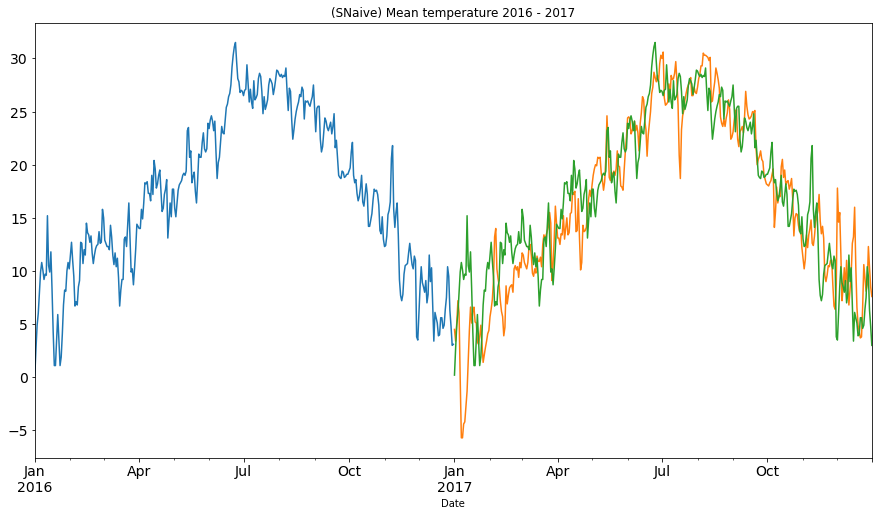

In [8]:
plt.figure('snaive')
mean_temp_2016.plot(figsize=(15,8), title= '(SNaive) Mean temperature 2016 - 2017', fontsize=14)
mean_temp_2017.plot()
forecasting_temp_2017.plot()
plt.show()

In [9]:
forecast_error = [mean_temp_2017[i] - forecasting_temp_2017[i] for i in range(0, mean_temp_2017.size)]
mean_absolute_deviation = sum([abs(fe) for fe in forecast_error]) / mean_temp_2017.size
print(f'MPA: ', mean_absolute_deviation)
mean_square_error = sum([(fe ** 2) for fe in forecast_error]) / mean_temp_2017.size
print(f'MSE: ', mean_square_error)
mean_absolute_percent_error = (sum([forecast_error[i]/mean_temp_2017[i] for
									i in range(0, len(forecast_error))]) / mean_temp_2017.size) * 100
print(f'MAPE: ', mean_absolute_percent_error)

MPA:  2.7717808219178095
MSE:  14.578493150684933
MAPE:  12.628410573430404


# ARIMA

In [10]:
from statsmodels.tsa.arima.model import ARIMA

history = [x for x in mean_temp_2016]
predictions = list()
# walk-forward validation
for t in range(len(mean_temp_2017)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = mean_temp_2017[t]
	history.append(obs)

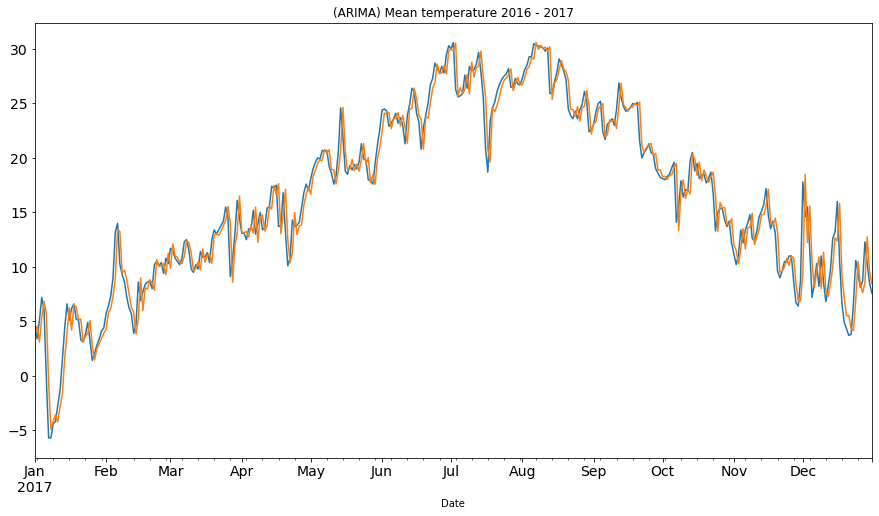

In [11]:
forecasting_temp_2017 = mean_temp_2017.copy()
forecasting_temp_2017[0:] = [x for x in predictions]

plt.figure('ARIMA')
mean_temp_2017.plot(figsize=(15,8), title= '(ARIMA) Mean temperature 2016 - 2017', fontsize=14)
forecasting_temp_2017.plot()
plt.show()

In [12]:
forecast_error = [mean_temp_2017[i] - forecasting_temp_2017[i] for i in range(0, mean_temp_2017.size)]
mean_absolute_deviation = sum([abs(fe) for fe in forecast_error]) / mean_temp_2017.size
print(f'MPA: ', mean_absolute_deviation)
mean_square_error = sum([(fe ** 2) for fe in forecast_error]) / mean_temp_2017.size
print(f'MSE: ', mean_square_error)
mean_absolute_percent_error = (sum([forecast_error[i]/mean_temp_2017[i] for
									i in range(0, len(forecast_error))]) / mean_temp_2017.size) * 100
print(f'MAPE: ', mean_absolute_percent_error)

MPA:  1.204290775125293
MSE:  2.7804123920191133
MAPE:  7.8364297808618675
